# UIDAI Data Hackathon 2026  
## Final Analysis & Conclusion Visualisations

This notebook generates the final, high-impact visualisations used in the
analysis and conclusion sections of the UIDAI Hackathon submission.

All figures are policy-oriented, interpretable, and saved for direct
inclusion in the final PDF report.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import os

plt.rcParams["figure.dpi"] = 120
plt.rcParams["font.size"] = 11

In [2]:
BASE_PATH = "/Users/aaronrao/Desktop/projects/UIDAI_Aadhaar_Data_Insights"

DATA_PATH = os.path.join(BASE_PATH, "data/processed")
MODEL_PATH = os.path.join(BASE_PATH, "outputs/tables")
FIG_PATH = os.path.join(BASE_PATH, "outputs/final_figures")

os.makedirs(FIG_PATH, exist_ok=True)

In [3]:
enrolment_df = pd.read_csv(os.path.join(DATA_PATH, "enrolment_cleaned.csv"))
biometric_df = pd.read_csv(os.path.join(DATA_PATH, "biometric_cleaned.csv"))
demographic_df = pd.read_csv(os.path.join(DATA_PATH, "demographic_cleaned.csv"))

model_df = pd.read_csv(
    os.path.join(MODEL_PATH, "aadhaar_service_stress_model_output.csv")
)

# Safety cleanup
model_df = model_df[model_df["state"].str.contains(r"[A-Za-z]", regex=True)]

/var/folders/qs/5q2_h5j931g_w8krqy_fjh640000gn/T/ipykernel_49242/3933306995.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  enrolment_df = pd.read_csv(os.path.join(DATA_PATH, "enrolment_cleaned.csv"))
/var/folders/qs/5q2_h5j931g_w8krqy_fjh640000gn/T/ipykernel_49242/3933306995.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  biometric_df = pd.read_csv(os.path.join(DATA_PATH, "biometric_cleaned.csv"))
/var/folders/qs/5q2_h5j931g_w8krqy_fjh640000gn/T/ipykernel_49242/3933306995.py:3: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  demographic_df = pd.read_csv(os.path.join(DATA_PATH, "demographic_cleaned.csv"))


### Figure 1: Age-wise Aadhaar Enrolment Composition

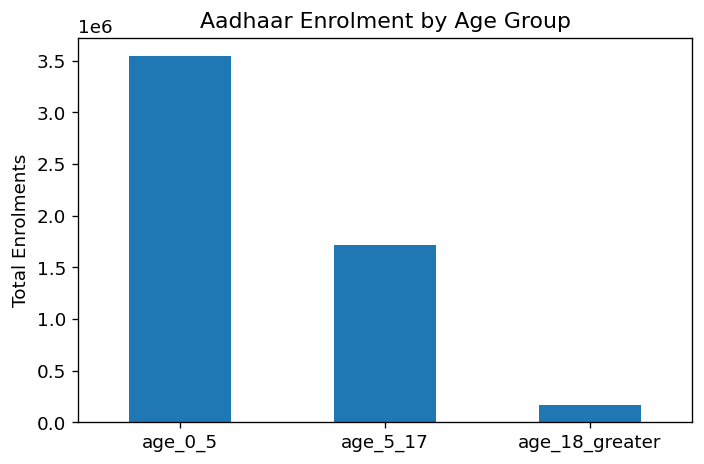

In [4]:
age_totals = enrolment_df[["age_0_5", "age_5_17", "age_18_greater"]].sum()

plt.figure(figsize=(6, 4))
age_totals.plot(kind="bar")

plt.title("Aadhaar Enrolment by Age Group")
plt.ylabel("Total Enrolments")
plt.xticks(rotation=0)
plt.tight_layout()

plt.savefig(os.path.join(FIG_PATH, "fig1_agewise_enrolment.png"), dpi=300)
plt.show()

### Figure 2: Year-wise Aadhaar Enrolment Trend

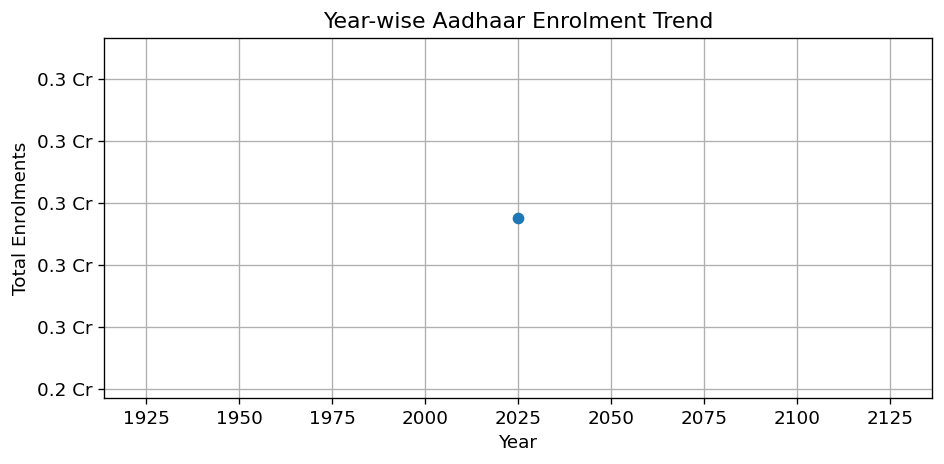

In [5]:
yearly_enrol = enrolment_df.groupby("year")["total_enrolments"].sum().reset_index()

plt.figure(figsize=(8, 4))
plt.plot(yearly_enrol["year"], yearly_enrol["total_enrolments"], marker="o")

plt.title("Year-wise Aadhaar Enrolment Trend")
plt.xlabel("Year")
plt.ylabel("Total Enrolments")
plt.grid(True)

plt.gca().yaxis.set_major_formatter(
    ticker.FuncFormatter(lambda x, _: f"{x/1e7:.1f} Cr")
)

plt.tight_layout()
plt.savefig(os.path.join(FIG_PATH, "fig2_yearly_enrolment.png"), dpi=300)
plt.show()

### Figure 3: Biometric vs Demographic Updates

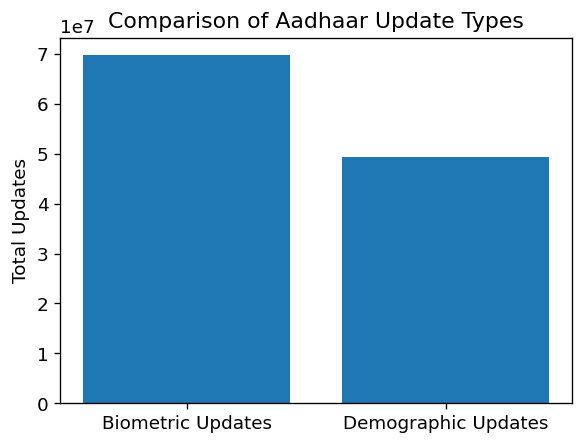

In [6]:
bio_total = biometric_df["total_biometric_updates"].sum()
demo_total = demographic_df["total_demographic_updates"].sum()

plt.figure(figsize=(5, 4))
plt.bar(["Biometric Updates", "Demographic Updates"], [bio_total, demo_total])

plt.title("Comparison of Aadhaar Update Types")
plt.ylabel("Total Updates")

plt.tight_layout()
plt.savefig(os.path.join(FIG_PATH, "fig3_update_comparison.png"), dpi=300)
plt.show()

### Figure 4: Enrolment vs Biometric Updates (District Level)

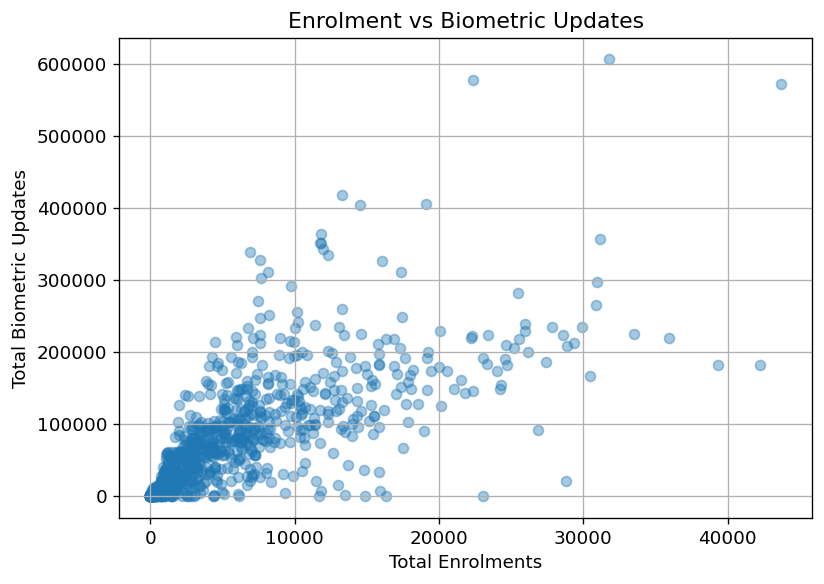

In [7]:
plt.figure(figsize=(7, 5))
plt.scatter(
    model_df["total_enrolments"],
    model_df["total_biometric_updates"],
    alpha=0.4
)

plt.title("Enrolment vs Biometric Updates")
plt.xlabel("Total Enrolments")
plt.ylabel("Total Biometric Updates")
plt.grid(True)

plt.tight_layout()
plt.savefig(os.path.join(FIG_PATH, "fig4_enrolment_vs_biometric.png"), dpi=300)
plt.show()

### Figure 5: Distribution of Aadhaar Service Stress Scores

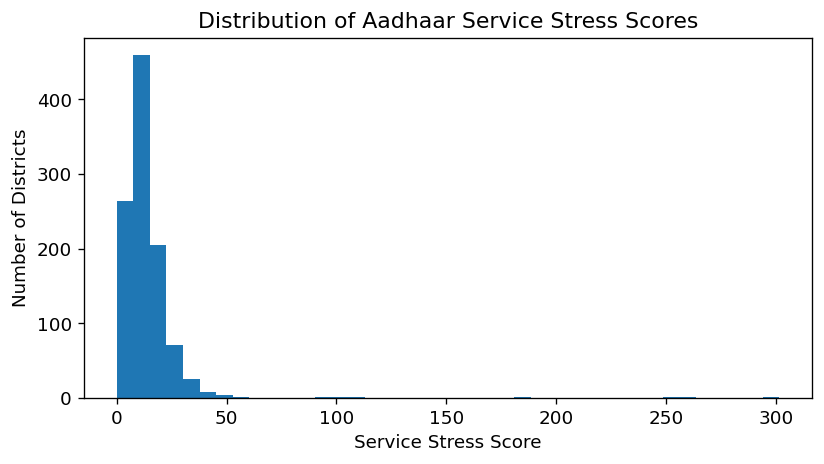

In [8]:
plt.figure(figsize=(7, 4))
plt.hist(model_df["service_stress_score"], bins=40)

plt.title("Distribution of Aadhaar Service Stress Scores")
plt.xlabel("Service Stress Score")
plt.ylabel("Number of Districts")

plt.tight_layout()
plt.savefig(os.path.join(FIG_PATH, "fig5_stress_distribution.png"), dpi=300)
plt.show()

### Figure 6: Top 10 Districts by Service Stress Score

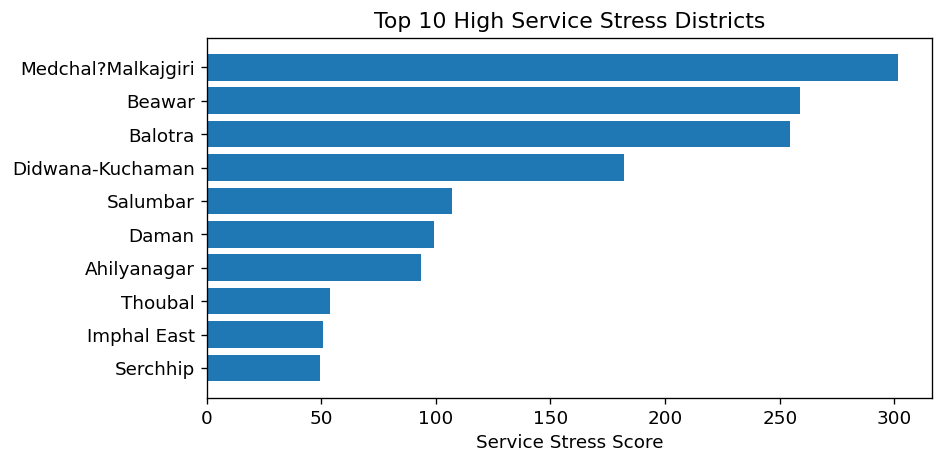

In [9]:
top10 = model_df.sort_values(
    "service_stress_score", ascending=False
).head(10)

plt.figure(figsize=(8, 4))
plt.barh(top10["district"], top10["service_stress_score"])
plt.gca().invert_yaxis()

plt.title("Top 10 High Service Stress Districts")
plt.xlabel("Service Stress Score")

plt.tight_layout()
plt.savefig(os.path.join(FIG_PATH, "fig6_top10_districts.png"), dpi=300)
plt.show()

### Figure 7: Average Aadhaar Service Stress by State

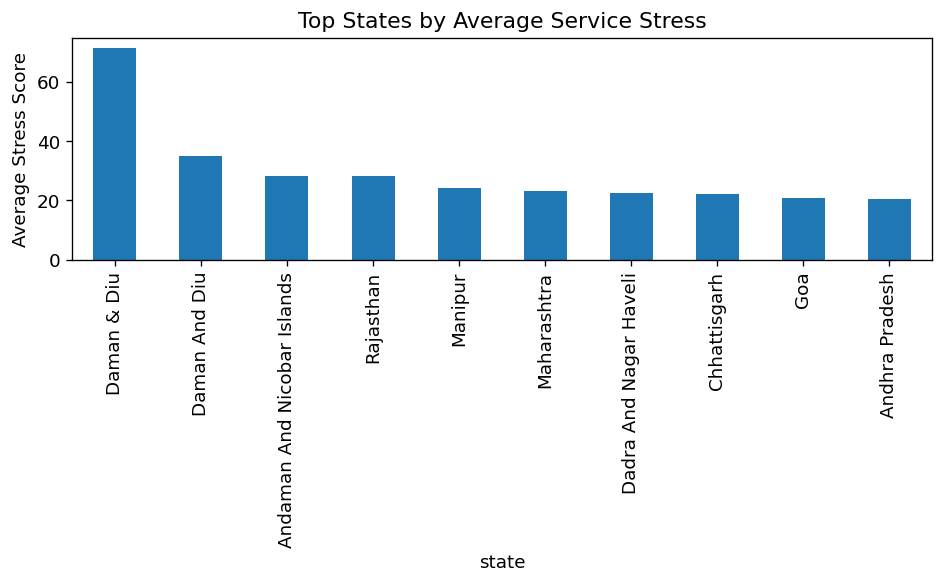

In [10]:
state_avg = model_df.groupby("state")["service_stress_score"].mean().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
state_avg.head(10).plot(kind="bar")

plt.title("Top States by Average Service Stress")
plt.ylabel("Average Stress Score")

plt.tight_layout()
plt.savefig(os.path.join(FIG_PATH, "fig7_state_avg_stress.png"), dpi=300)
plt.show()

### Figure 8: Biometric vs Demographic Update Intensity (District Level)

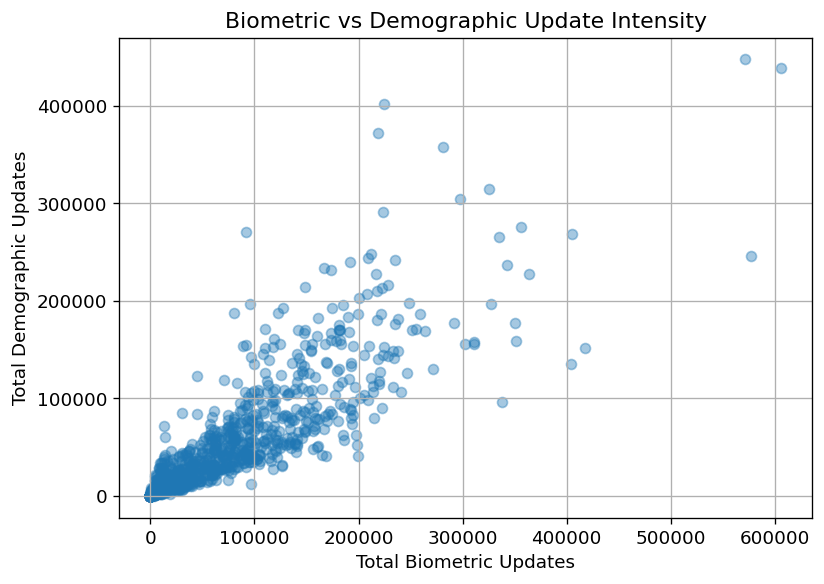

In [11]:
plt.figure(figsize=(7, 5))

plt.scatter(
    model_df["total_biometric_updates"],
    model_df["total_demographic_updates"],
    alpha=0.4
)

plt.xlabel("Total Biometric Updates")
plt.ylabel("Total Demographic Updates")
plt.title("Biometric vs Demographic Update Intensity")

plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(FIG_PATH, "fig8_bio_vs_demo_updates.png"), dpi=300)
plt.show()

### Figure 9: Update Burden per Enrolment

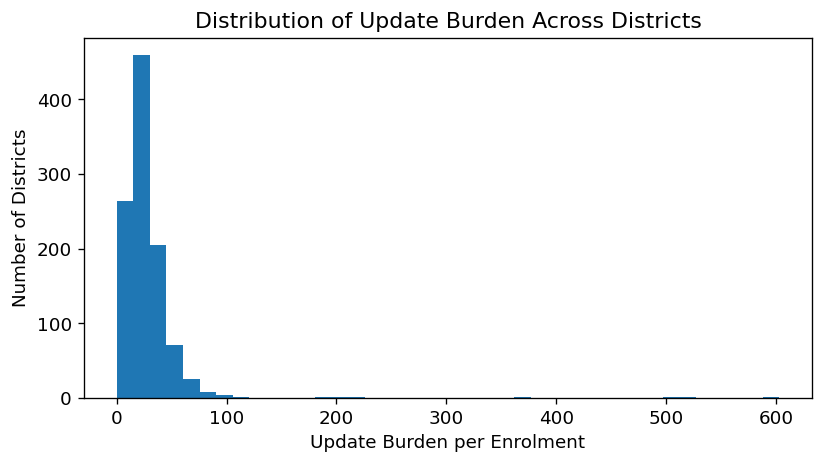

In [12]:
model_df["update_burden"] = (
    model_df["total_biometric_updates"] +
    model_df["total_demographic_updates"]
) / model_df["total_enrolments"]

plt.figure(figsize=(7, 4))
plt.hist(model_df["update_burden"], bins=40)

plt.xlabel("Update Burden per Enrolment")
plt.ylabel("Number of Districts")
plt.title("Distribution of Update Burden Across Districts")

plt.tight_layout()
plt.savefig(os.path.join(FIG_PATH, "fig9_update_burden.png"), dpi=300)
plt.show()

### Figure 10: Distribution of Districts by Stress Category

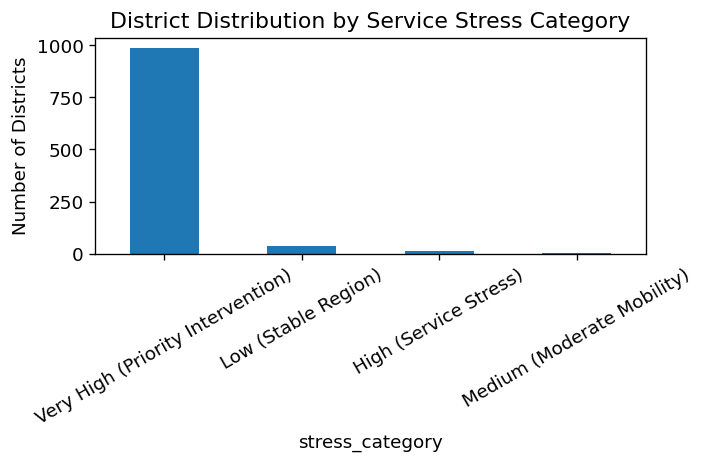

In [13]:
category_counts = model_df["stress_category"].value_counts()

plt.figure(figsize=(6, 4))
category_counts.plot(kind="bar")

plt.title("District Distribution by Service Stress Category")
plt.ylabel("Number of Districts")
plt.xticks(rotation=30)

plt.tight_layout()
plt.savefig(os.path.join(FIG_PATH, "fig10_stress_category_distribution.png"), dpi=300)
plt.show()

### Figure 11: Enrolment Saturation vs Update Demand

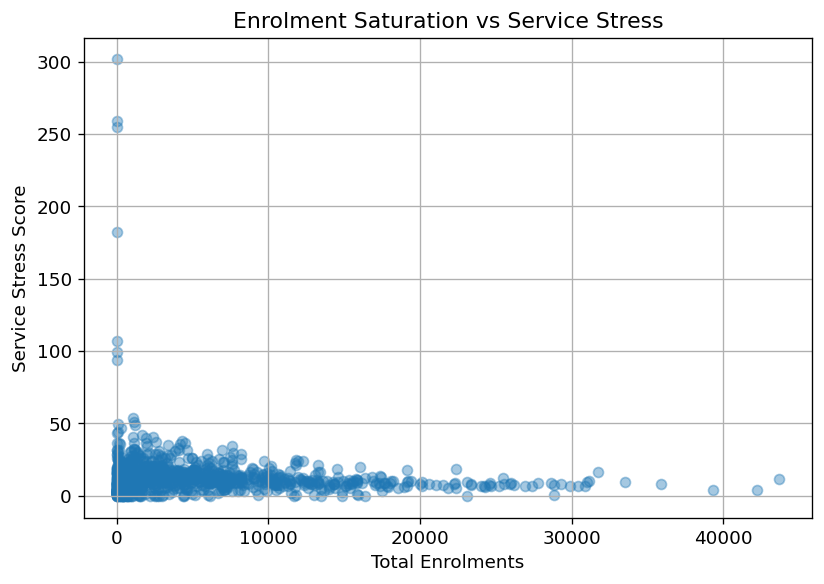

In [14]:
plt.figure(figsize=(7, 5))

plt.scatter(
    model_df["total_enrolments"],
    model_df["service_stress_score"],
    alpha=0.4
)

plt.xlabel("Total Enrolments")
plt.ylabel("Service Stress Score")
plt.title("Enrolment Saturation vs Service Stress")

plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(FIG_PATH, "fig11_enrolment_vs_stress.png"), dpi=300)
plt.show()

### Figure 12: Variability of Service Stress Within States

<Figure size 960x600 with 0 Axes>

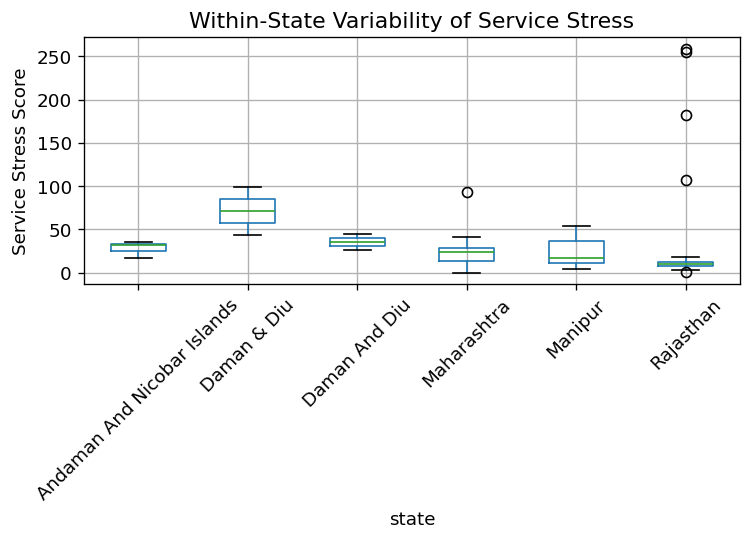

In [15]:
top_states = (
    model_df.groupby("state")["service_stress_score"]
    .mean()
    .sort_values(ascending=False)
    .head(6)
    .index
)

plt.figure(figsize=(8, 5))
model_df[model_df["state"].isin(top_states)].boxplot(
    column="service_stress_score",
    by="state",
    rot=45
)

plt.title("Within-State Variability of Service Stress")
plt.suptitle("")
plt.ylabel("Service Stress Score")

plt.tight_layout()
plt.savefig(os.path.join(FIG_PATH, "fig12_state_variability.png"), dpi=300)
plt.show()

## Summary

This notebook generated the final analytical and conclusion-oriented
visualisations for the UIDAI Data Hackathon submission.

The figures collectively demonstrate:
- Enrolment saturation across age groups
- Sustained update demand in high-mobility regions
- Clear identification of service stress hotspots
- Practical applicability of the proposed service stress model

All figures are saved in `outputs/final_figures/` for direct use in the
final submission PDF.
